In [1]:
import subprocess
from memory_profiler import memory_usage
from torch.profiler import profile, ProfilerActivity

from cubes import get_cube

STAGE:2024-11-11 20:53:26 69402:8857240 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2024-11-11 20:53:28 69402:8857240 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-11-11 20:53:28 69402:8857240 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


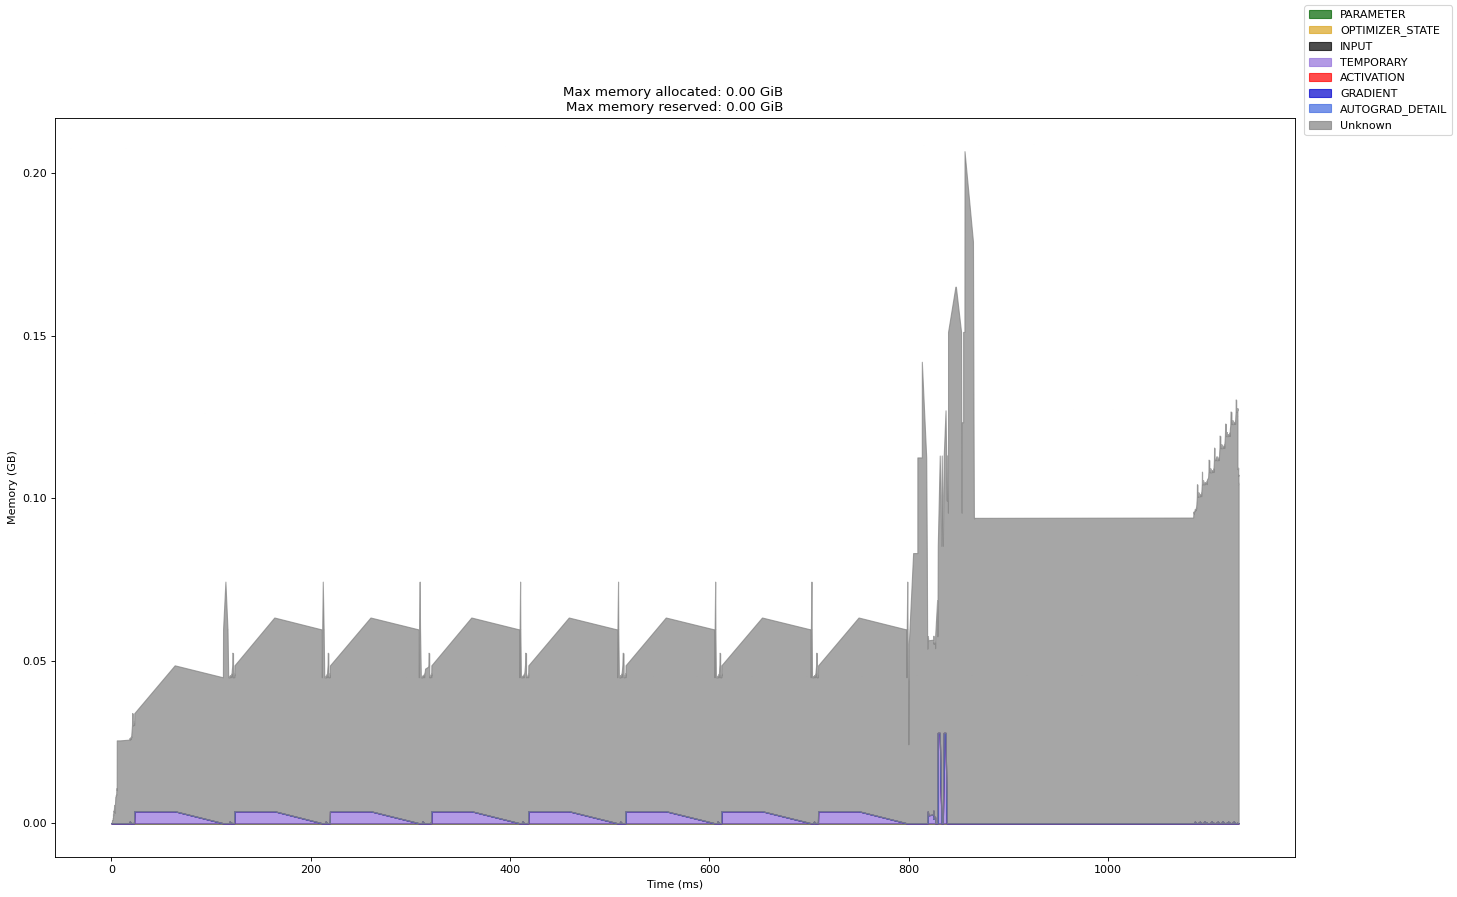

In [2]:
with profile(
    activities=[ProfilerActivity.CPU],
    profile_memory=True,
    record_shapes=True,
    with_stack=True,
) as prof:
    cube = get_cube(20)
    solution = cube.solve()

# Show memory allocation over time
prof.export_memory_timeline("memory.html")

# Export trace to Chrome Trace format (this can be opened in chrome://tracing or https://ui.perfetto.dev/)
prof.export_chrome_trace("trace.json")

In [3]:
# add @profile decorator to function to be profiled
cube = get_cube(20)
solution = cube.solve()

In [2]:
print("|  N  |     DOFs |  FWD Time |  BWD Time |   Peak RAM |")
print("| --- | -------- | --------- | --------- | ---------- |")

device = "cpu"
for N in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    mem_usage, result = memory_usage(
        lambda: subprocess.run(
            ["python", "cubes.py", "-N", str(N), "-device", device],
            capture_output=True,
            text=True,
        ),
        retval=True,
        include_children=True,
        max_usage=True,
        interval=0.1,
    )

    print(result.stdout.strip() + f" {mem_usage:8.1f}MB |")

|  N  |     DOFs |  FWD Time |  BWD Time |   Peak RAM |
| --- | -------- | --------- | --------- | ---------- |
|  10 |     3000 |     0.22s |     0.17s |    588.5MB |
|  20 |    24000 |     0.57s |     0.31s |    948.7MB |
|  30 |    81000 |     2.09s |     1.45s |   1985.5MB |
|  40 |   192000 |     5.67s |     4.22s |   3059.0MB |
|  50 |   375000 |    11.78s |    10.08s |   4675.2MB |
|  60 |   648000 |    23.13s |    21.29s |   5796.8MB |
|  70 |  1029000 |    42.16s |    40.84s |   5859.5MB |
|  80 |  1536000 |    71.58s |    68.12s |   7295.4MB |
|  90 |  2187000 |   118.81s |   128.24s |   7540.7MB |
